In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from activ import load_data
from PyUoI.UoINMF import UoINMF
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from activ.data_normalization import data_normalization
from scipy.spatial.distance import pdist
from sklearn.model_selection import KFold

In [6]:
data = load_data()

In [7]:
data_oc = data_normalization(data.outcomes, 'positive')
data_oc.shape

(247, 177)

In [8]:
train_oc, test_oc = train_test_split(data_oc)
print(train_oc.shape, test_oc.shape)

(185, 177) (62, 177)


In [9]:
eps = np.arange(0.1,0.3,0.1)
minsamples = np.arange(5,15,5)
print(eps.shape, minsamples.shape)

(2,) (2,)


In [10]:
kf = KFold(n_splits=10)
error_mat = np.zeros((2,2,10))
for k, (train_index, test_index) in enumerate(kf.split(data_oc)):
    train, test = data_oc[train_index], data_oc[test_index]
    train_oc = train
    test_oc = test
    for ii,e in enumerate(eps):
        for jj,m in enumerate(minsamples):
            db = DBSCAN(eps=e, min_samples=m)
            uoinmf = UoINMF(ranks=list(range(2,20)),dbscan=db)
            decomp = uoinmf.fit(train_oc)
            H = decomp.components_
            print(H.shape)
            W = decomp.transform(test_oc, reconstruction_err=True)
            error = np.linalg.norm(test_oc-W@H)
            error_mat[ii,jj,k] = error

(21, 177)
(2, 177)
(86, 177)
(22, 177)
(12, 177)
(1, 177)
(79, 177)
(23, 177)
(21, 177)
(2, 177)
(77, 177)
(25, 177)
(22, 177)
(1, 177)
(95, 177)
(22, 177)
(18, 177)
(1, 177)
(80, 177)
(24, 177)
(20, 177)
(1, 177)
(77, 177)
(21, 177)
(15, 177)
(2, 177)
(77, 177)
(19, 177)
(14, 177)
(2, 177)
(83, 177)
(25, 177)
(9, 177)
(2, 177)
(95, 177)
(18, 177)
(15, 177)
(1, 177)
(77, 177)
(19, 177)


In [18]:
error_mat2 = error_mat.mean(axis=2)

IndexError: tuple index out of range

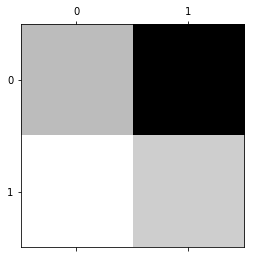

In [14]:
plt.matshow(error_mat, cmap='gray_r')

In [24]:
trunc = error_mat[0:len(eps), 0:len(minsamples)]

In [ ]:
np.unravel_index(np.argmin(trunc), trunc.shape)

In [28]:
eps[3], minsamples[0]

(0.40000000000000002, 5)

(array([  11899.,   10185.,    7832.,   12347.,   13359.,   24851.,
          97967.,  338912.,  720943.,  546810.]),
 array([ 0.01121141,  0.15151163,  0.29181184,  0.43211206,  0.57241227,
         0.71271249,  0.8530127 ,  0.99331292,  1.13361313,  1.27391335,
         1.41421356]),
 <a list of 10 Patch objects>)

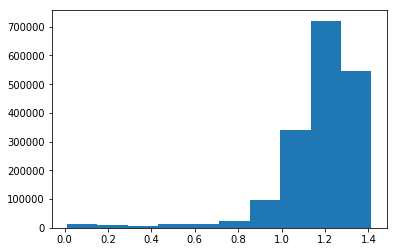

In [61]:
plt.hist(pdist(uoinmf.bases_samples_))

In [33]:
eps = np.arange(0.1,0.3,0.1)
minsamples = np.arange(1,4,1)

train_oc, test_oc = train_test_split(data_oc)
error_mat = np.zeros((2,3))
for e in eps:
    for m in minsamples:
        db = DBSCAN(eps=e, min_samples=m)
#         uoinmf = UoINMF(n_bootstraps_i=100, ranks=list(range(2,20)), dbscan=db)
        uoinmf = UoINMF(ranks=list(range(2,20)),dbscan=db)
        decomp = uoinmf.fit(train_oc) #H
        H = decomp.
        W = decomp.transform(test_oc,reconstruction_err=True)
        
        error = np.linalg.norm(data_oc-W@H)
#         print(error)

       
    

ValueError: shapes (62,1364) and (1890,177) not aligned: 1364 (dim 1) != 1890 (dim 0)

In [13]:
eps = np.arange(0.1,1.1,0.1)
minsamples = np.arange(1,11,1)
train_oc, test_oc = train_test_split(data_oc)
error_mat = np.zeros((10,10))
for e in eps:
    for m in minsamples:
        db = DBSCAN(eps=e, min_samples=m)
        uoinmf = UoINMF(n_bootstraps_i=100, ranks=list(range(2,20)), dbscan=db)
        error = uoinmf.fit_transform(test_oc)
        error_mat[e,m] = error
        print(error)

[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          2.18777798  0.         ...,  0.          0.          0.        ]
 [ 0.          4.1238667   0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          2.99097462  0.         ...,  0.          0.          0.        ]
 [ 0.          0.41811268  0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]
[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          1.9725986   0.         ...,  0.          0.          0.        ]
 [ 0.          3.89112362  0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          3.07573496  0.         ...,  0.          0.          0.        ]
 [ 0.          0.25416844  0.         ...,  0.          0.          0.        ]
 [ 0.          1.19962704  0.         ...,  0.1000916   0.          0.        ]]
[[ 0.          0.2610213

/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


[[ 0.          0.          0.         ...,  0.13528132  0.          0.        ]
 [ 0.          1.023223    0.         ...,  0.          0.          0.        ]
 [ 0.          4.2616072   0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          2.21800009  0.         ...,  0.          0.          0.        ]
 [ 0.          0.25893002  0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]
[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          2.35883854  0.         ...,  0.          0.          0.        ]
 [ 0.          4.11978339  0.         ...,  0.          0.          0.19327614]
 ..., 
 [ 0.          3.03225716  0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]


/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.96816352  0.         ...,  0.          0.          0.        ]
 [ 0.          3.74086515  0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          2.92000644  0.         ...,  0.          0.          0.        ]
 [ 0.          0.00763306  0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]
[[ 0.         0.         0.        ...,  0.         0.         0.0722953]
 [ 0.         0.         0.        ...,  0.         0.         0.       ]
 [ 0.         0.         0.        ...,  0.         0.         0.       ]
 ..., 
 [ 0.         0.         0.        ...,  0.         0.         0.       ]
 [ 0.         0.         0.        ...,  0.         0.         0.       ]
 [ 0.         0.         0.        ...,  0.         0.         0.       ]]
[[ 0.          0.          0.         ...,  0.          0.  

[[ 0.          0.04492622  0.         ...,  0.          0.          0.        ]
 [ 0.          2.19290043  0.         ...,  0.          0.          0.        ]
 [ 0.          4.48697982  0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          3.21505109  0.         ...,  0.          0.          0.        ]
 [ 0.          0.50120084  0.         ...,  0.          0.          0.        ]
 [ 0.          1.53581731  0.         ...,  0.          0.          0.        ]]
[[ 0.08111911  0.          0.         ...,  0.          0.          0.19756509]
 [ 2.85330779  0.          0.         ...,  0.          0.          0.        ]
 [ 4.54479615  0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 3.28387735  0.          0.         ...,  0.          0.          0.        ]
 [ 0.59813091  0.          0.         ...,  0.          0.          0.        ]
 [ 1.49460929  0.          0.         ...,  0.          0.          0.        ]]
[[ 0.          0.       

/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


[[ 0.32332484  0.          0.         ...,  0.          0.          0.        ]
 [ 2.71387178  0.          0.         ...,  0.          0.          0.        ]
 [ 4.52381049  0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 3.35018539  0.          0.         ...,  0.          0.          0.        ]
 [ 0.7976706   0.          0.         ...,  0.          0.          0.        ]
 [ 1.48806807  0.          0.         ...,  0.          0.          0.        ]]


/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


[[ 0.16010194  0.          0.         ...,  0.          0.          0.        ]
 [ 2.64739524  0.          0.         ...,  0.          0.68495364  0.        ]
 [ 4.38798693  0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 3.17096425  0.          0.         ...,  0.          0.          0.        ]
 [ 0.59474975  0.          0.         ...,  0.          0.          0.        ]
 [ 1.67518697  0.          0.         ...,  0.          0.          0.        ]]
[[ 0.38433025  0.          0.         ...,  0.          0.          0.        ]
 [ 2.64444218  0.          0.         ...,  0.          0.          0.        ]
 [ 4.3683987   0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 2.858215    0.          0.         ...,  0.          0.          0.        ]
 [ 0.41059869  0.          0.         ...,  0.          0.          0.        ]
 [ 1.53629607  0.          0.         ...,  0.          0.          0.        ]]
[[ 0.          0.2783236

/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


[[ 0.          0.20945842  0.         ...,  0.          0.          0.        ]
 [ 0.          2.27930775  0.         ...,  0.          0.          0.        ]
 [ 0.          4.30168533  0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          3.34167068  0.         ...,  0.          0.          0.        ]
 [ 0.          0.40689069  0.         ...,  0.          0.          0.        ]
 [ 0.          1.23914069  0.         ...,  0.          0.          0.        ]]


/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


[[  0.00000000e+00   2.24204803e-03   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   2.02725478e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   4.64221993e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   3.22586115e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   2.25512830e-01   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.21875239e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]


/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 2.45848478  0.          0.         ...,  0.          0.          0.        ]
 [ 4.41080622  0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 3.39205755  0.          0.         ...,  0.          0.          0.        ]
 [ 0.62323698  0.          0.         ...,  0.          0.          0.        ]
 [ 1.46040908  0.          0.         ...,  0.          0.          0.        ]]
[[ 0.          0.24427652  0.         ...,  0.          0.02397124  0.        ]
 [ 0.          2.74503894  0.         ...,  0.          0.          0.        ]
 [ 0.          4.41772706  0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          3.28763348  0.         ...,  0.          0.          0.        ]
 [ 0.          0.76826275  0.         ...,  0.          0.          0.        ]
 [ 0.          1.28982901  0.         ...,  0.          0.0660879   0.        ]]


/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


[[ 0.12042835  0.          0.         ...,  0.          0.          0.        ]
 [ 2.37230594  0.          0.         ...,  0.          0.          0.        ]
 [ 4.13743232  0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 3.1567381   0.          0.         ...,  0.          0.          0.        ]
 [ 0.40178579  0.          0.         ...,  0.          0.          0.        ]
 [ 1.5303052   0.          0.         ...,  0.          0.          0.        ]]


/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


[[  0.00000000e+00   7.04159167e-02   0.00000000e+00 ...,   0.00000000e+00
    2.36619395e-03   0.00000000e+00]
 [  0.00000000e+00   2.79086745e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   4.30484696e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   3.35915412e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   3.26388858e-01   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.19669575e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]


KeyboardInterrupt: 

In [ ]:
plt.matshow()

In [51]:

db = DBSCAN(eps=.4, min_samples=20)
uoinmf = UoINMF(ranks=list(range(2,20)),dbscan=db)
uoinmf.fit(data_oc)


UoINMF(dbscan=DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=20, n_jobs=1, p=None),
    lasso=None, n_boostraps_u=None, n_bootstraps_i=10,
    nmf=NMF(alpha=0.0, beta_loss='kullback-leibler', init=None, l1_ratio=0.0,
  max_iter=400, n_components=19, random_state=None, shuffle=False,
  solver='mu', tol=0.0001, verbose=0),
    random_state=None,
    ranks=(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19))

In [52]:
uoinmf.components_.shape

(6, 177)

In [53]:
from activ.analytics import nmf_bases_heatmap

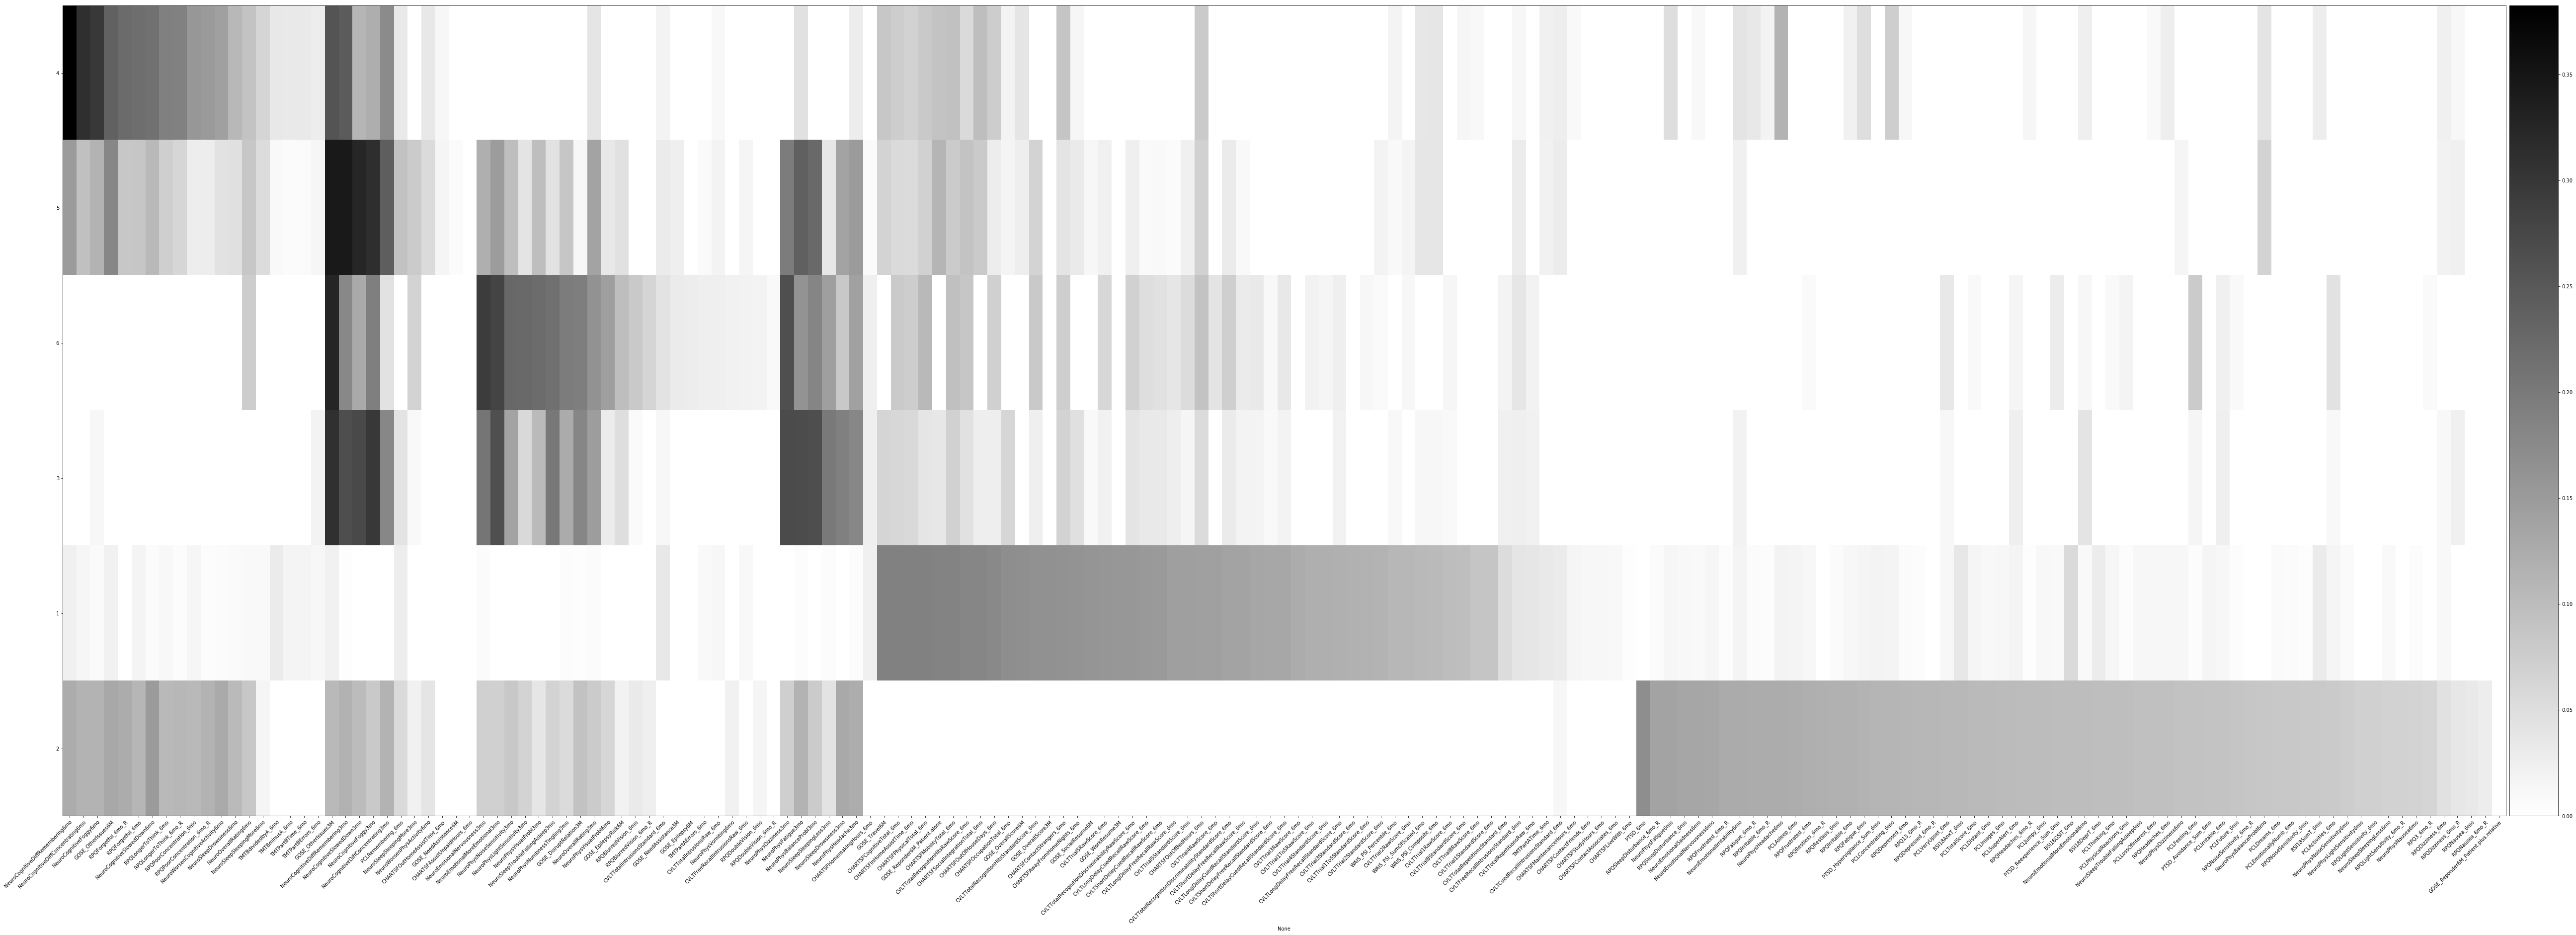

In [55]:
plt.figure(figsize=(90,30))
nmf_bases_heatmap(uoinmf.components_, data.outcome_features, sort=True, ax=None, aspect='auto')

In [59]:
uoinmf.transform(data_oc)
uoinmf.reconstruction_err_

53.051033087867602

In [30]:
from mpi4py import MPI

ModuleNotFoundError: No module named 'mpi4py'

In [29]:

kf = KFold(n_splits=10)
comm = MPI.COMM_WORLD
name = MPI.Get_processor_name()
rank = comm.Get_rank()
size = comm.Get_size()

n_splits = 10
kf = KFold(n_splits=10)
indices = range(rank, nsplits, size)
error_mat = np.zeros((10,10,10))



for k, (train_index, test_index) in enumerate(kf.split(data_oc)):
    train, test = data_oc[train_index], data_oc[test_index]
    train_oc = train
    test_oc = test

ModuleNotFoundError: No module named 'mpi4py'

In [32]:
indices = range(0, 10, 1)
for k, (train_index, test_index) in zip(indices,(kf.split(data_oc))):
    print(k)
    print(train_index, test_index)

0
[ 25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42
  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
1
[  0   1   2   3 